# 7-й семинар


In [3]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import bernoulli, cauchy, norm, gamma, poisson, binom, uniform, laplace, expon, trim_mean, iqr, beta, chi2_contingency, kstwobign, kstest, anderson
import statistics
from tqdm import tqdm
from matplotlib import rc
from math import pi, log, tan, sin
from scipy.optimize import minimize
import scipy.special
import statsmodels.api as sm
import pandas as pd

# 1)

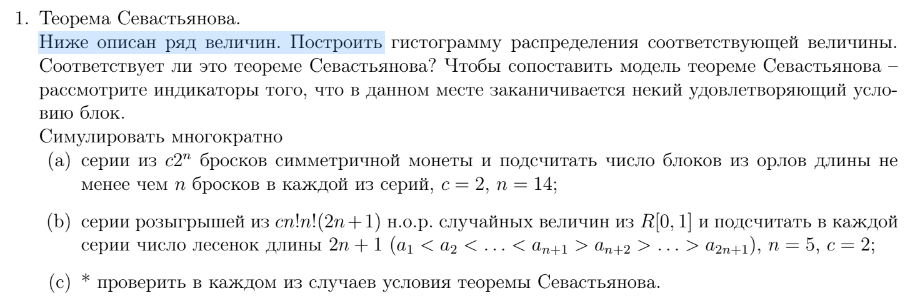!

(array([0.141, 0.244, 0.292, 0.172, 0.098, 0.038, 0.01 , 0.004, 0.001,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5]),
 <BarContainer object of 15 artists>)

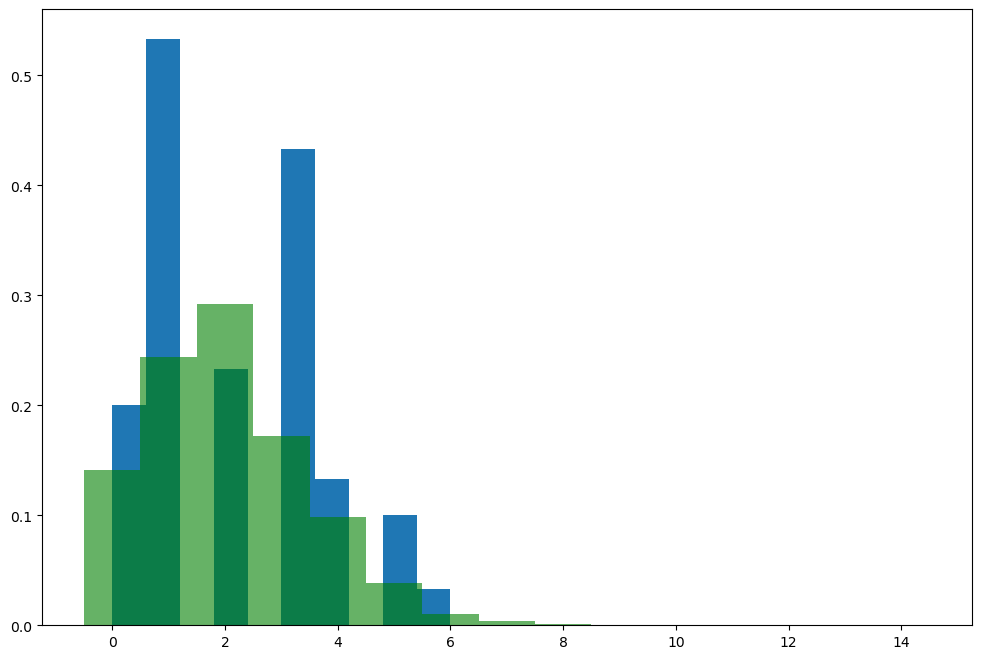

In [4]:
import numpy as np
import math
import scipy.stats as sts
import matplotlib.pyplot as plt

n = 5
c = 2
N = c * (math.factorial(n)**2) * (2*n + 1)

def is_ladder(vec, n):
    for i in range(n):
        if vec[i] >= vec[i + 1]:
            return False
    for i in range(n, 2 * n):
        if vec[i] <= vec[i + 1]:
            return False
    return True

def count_ladders(vec, length):
    count = 0
    for i in range(len(vec) - length - 1):
        if is_ladder(vec[i:i + length], n):
            count += 1
    return count

num_simulations = 50
num_counts = []
for i in range(num_simulations):
    length = 2*n + 1
    vec = np.array([sts.uniform.rvs(0,1) for _ in range(N)])
    num_counts.append(count_ladders(vec, length))

plt.figure(figsize =(12,8))
plt.hist(num_counts, density = True)
mu = 2
#mu = np.array(X).mean()
samples = poisson.rvs(mu, size=1000)
plt.hist(samples, bins=np.arange(0, 16) - 0.5, density=True, alpha=0.6, color='g', label='Гистограмма выборки')

In [6]:
import itertools
c = 2
n = 5
N = 50

Y = sts.uniform().rvs(size = (N, c * (math.factorial(n) ** 2) * (2 * n + 1)))
X = np.zeros(N)
for i in range(N):
    a = [(k, len(list(g))) for k, g in itertools.groupby(np.diff(Y[i]) > 0)]
    if not a[0][0]:
        a = a[1:]
    for j in range(0, len(a) - 1, 2):
        if a[j][1] >= n and a[j + 1][1] >= n:
            X[i] += 1

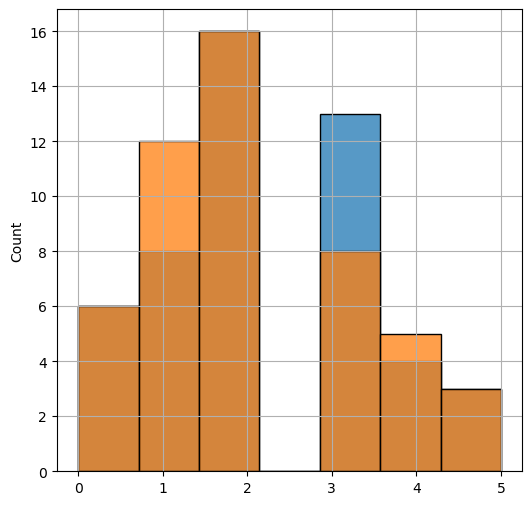

In [7]:
plt.figure(figsize=(6, 6))
sns.histplot(X)
sns.histplot(sts.poisson(np.array(X).mean()).rvs(size=len(X)))
plt.grid()
plt.show()

# 2b)

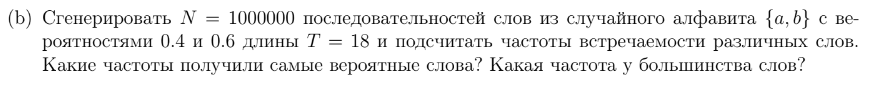

In [8]:
N = 1000000
T = 18
ABC = ["a", "b"]
big_word = []
def generate(N, T, ABC):
    X = []
    for _ in range(N):
        X.append(np.random.choice(ABC, p=[0.4, 0.6], size=T))
    X_tranc = ["".join(X[i]) for i in range(N)]
    X_tranc_count, counter = np.unique(X_tranc, return_counts=True)
    return X_tranc_count, counter

X, counter = generate(N,T,ABC)
print(len(X))
print(len(counter))
maxim = np.max(counter)
ind_1 = list(counter).index(maxim)
print(ind_1)
counter[ind_1] = 0
maxim = np.max(counter)
ind_2 = list(counter).index(maxim)
print(ind_2)
counter[ind_2] = 0
maxim = np.max(counter)
ind_3 = list(counter).index(maxim)
print(ind_3)
print(f"Топ 3 вероятных слов:\n 3): {X[ind_1]}\
      \n 2): {X[ind_2]}\
      \n 1): {X[ind_3]}")

print("Средняя частота:", np.mean(counter))


224089
224089
224088
224072
224087
Топ 3 вероятных слов:
 3): bbbbbbbbbbbbbbbbbb      
 2): bbbbbbbbbbbbbabbbb      
 1): bbbbbbbbbbbbbbbbba
Средняя частота: 4.461794197841036


# 3)

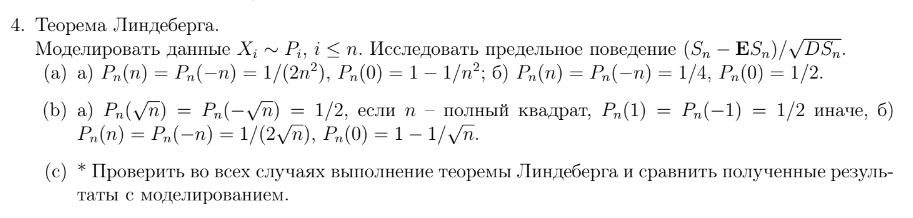

# пункт б)

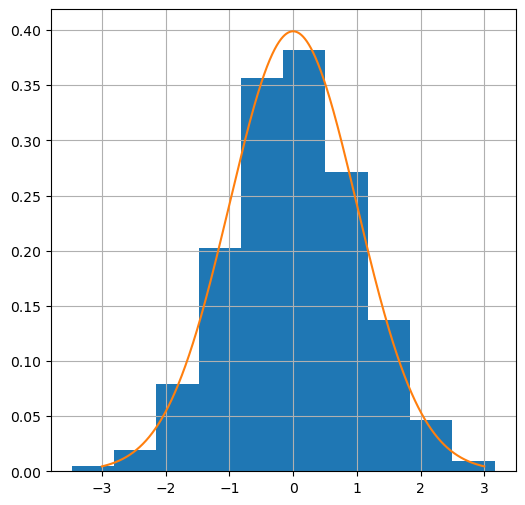

In [9]:
n = 5000
N = 5000 # размер выборки S_n^*

X = np.empty((n, N))
x = np.linspace(-3, 3, 3000)
for i in range(1, n + 1):
    if np.sqrt(i) == int(np.sqrt(i)):
        X[i - 1] = np.random.choice([np.sqrt(i), -np.sqrt(i)], size = N, p = [1 / 2, 1 / 2])
    else:
        X[i - 1] = np.random.choice([1, -1], size = N, p = [1 / 2, 1 / 2])
plt.figure(figsize=(6, 6))
plt.hist(X.sum(axis=0) / np.sqrt(np.sum([i if np.sqrt(i) == int(np.sqrt(i)) else 1 for i in range(1, n + 1)])), density=True)
plt.plot(x, sts.norm().pdf(x))
plt.grid()
plt.show()

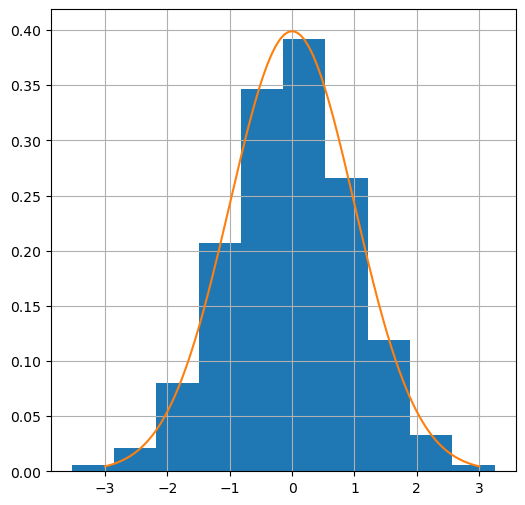

In [10]:
X = np.empty((n, N))
x = np.linspace(-3, 3, 3000)
for i in range(1, n + 1):
  X[i - 1] = np.random.choice([i, -i, 0], size = N, p = [1 / (2*np.sqrt(i)), 1 / (2*np.sqrt(i)), 1 - 1 / np.sqrt(i)])
plt.figure(figsize=(6, 6))
plt.hist(X.sum(axis=0) / np.sqrt(np.sum([i * np.sqrt(i) for i in range(1, n + 1)])), density=True)
plt.plot(x, sts.norm().pdf(x))
plt.grid()
plt.show()

# 5)

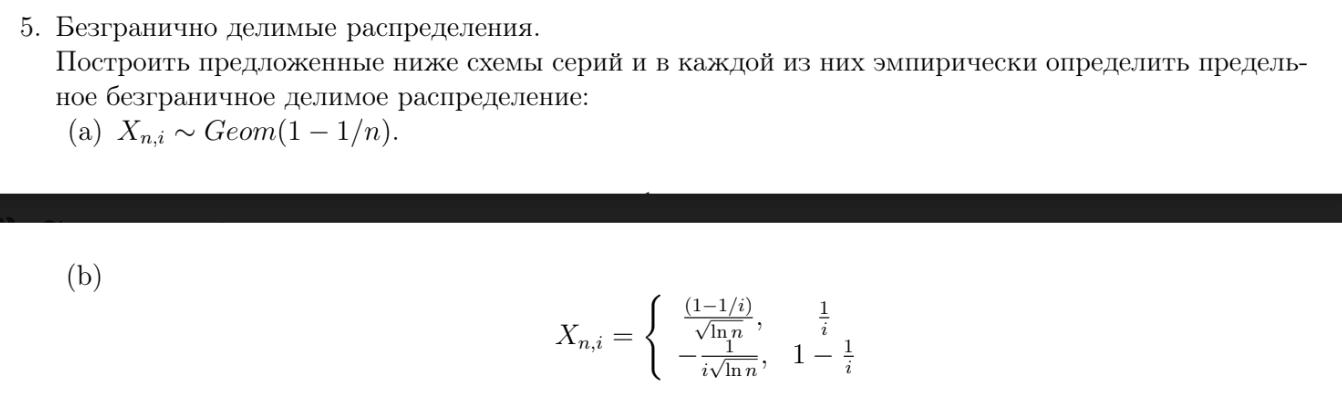

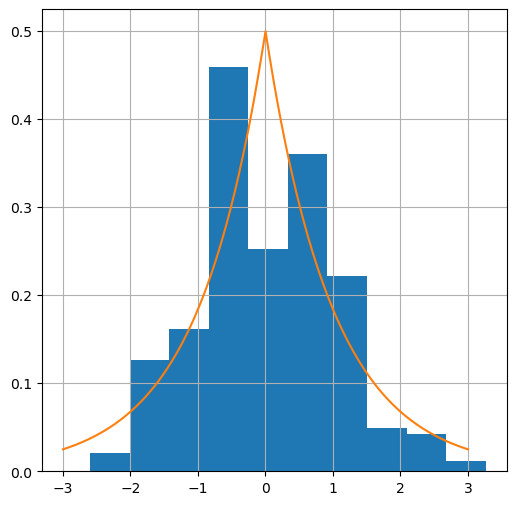

In [11]:
n = 5000
N = 1000

X = np.empty((n, N))
for i in range(1, n + 1):
    X[i - 1] = np.random.choice([(1 - 1/i) / np.sqrt(np.log(n)), -1 / (i * np.sqrt(np.log(n)))], p = [1 / i, 1 - 1 / i], size = N)

mu = 0
s = np.sqrt(np.sum([(1 - 1 / i) / (i * np.log(n)) for i in range(1, n + 1)]))
plt.figure(figsize=(6, 6))
plt.hist((X.sum(axis=0) - mu) / s, density=True)
plt.plot(np.linspace(-3, 3, 3000), sts.laplace().pdf(np.linspace(-3, 3, 3000)))
plt.grid()
plt.show()